In [1]:
import anndata as ad
adata = ad.read_h5ad('species.h5ad')
adata.obs

,condition,species,individual,batch,louvain,n_counts,condition_species
index,,,,,,,
AAACCTGTCGGTCTAA-1-0-0-0-0,LPS6,rabbit,3,0,7,1776.0,LPS6_rabbit
AAACCTGTCTGTCCGT-1-0-0-0-0,LPS6,rabbit,3,0,9,2722.0,LPS6_rabbit
AAACGGGAGCCGATTT-1-0-0-0-0,LPS6,rabbit,3,0,3,1396.0,LPS6_rabbit
AAACGGGAGGCGCTCT-1-0-0-0-0,LPS6,rabbit,3,0,3,1591.0,LPS6_rabbit
AAACGGGCACAACGCC-1-0-0-0-0,LPS6,rabbit,3,0,9,1341.0,LPS6_rabbit
...,...,...,...,...,...,...,...
ACTTTCACATTAGGCT-1-2-0-1-0,LPS6,pig,3,0,0,3906.0,LPS6_pig
AACTTTCAGAGTAAGG-1-1-0-1-1,LPS6,mouse,1,1,4,2423.0,LPS6_mouse
CGAGCACGTAATCACC-1-2-1-0-1,unst,rat,1,1,1,11297.0,unst_rat


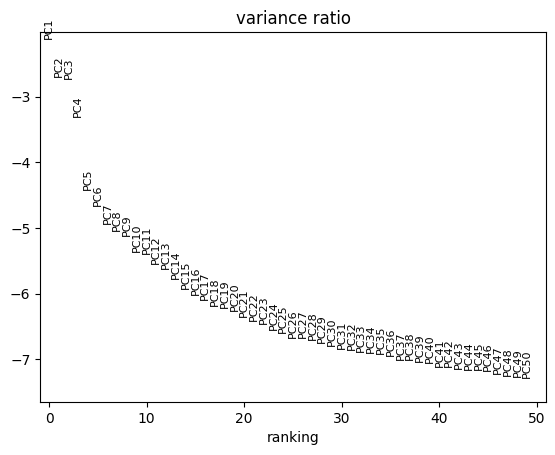

In [2]:
import scanpy as sc
sc.pp.pca(adata)
sc.pl.pca_variance_ratio(adata, log = True, n_pcs = 50)

In [3]:
sc.pp.neighbors(adata, n_pcs = 50)
sc.tl.umap(adata)

/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_3297122/3143127361.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs = adata.obs.replace('unst', 'Unst')
/tmp/ipykernel_3297122/3143127361.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs = adata.obs.replace(cell_label, cell_label.capitalize())


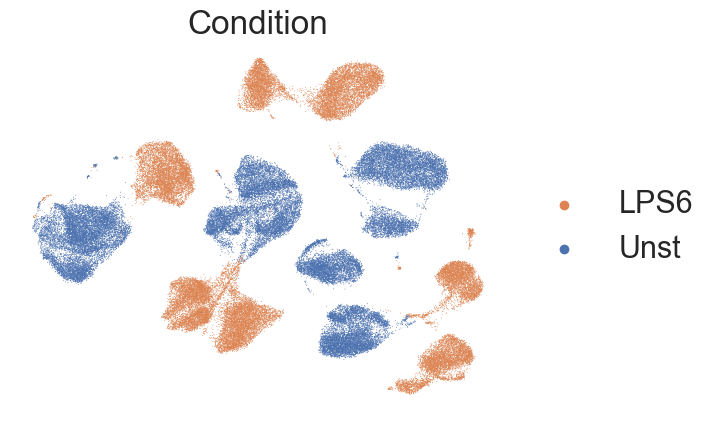

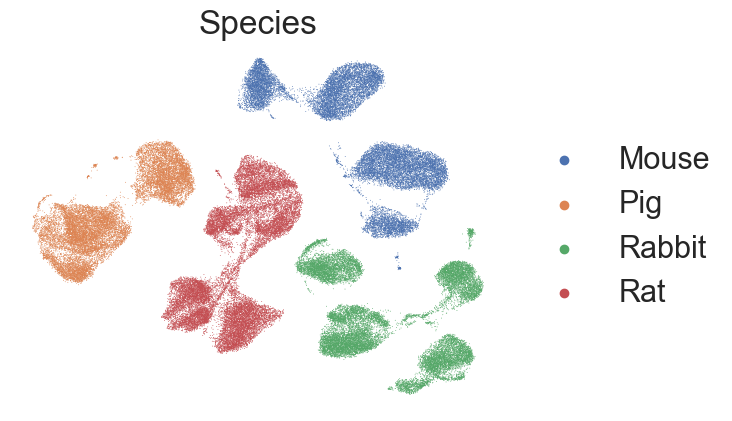

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style = 'white', font = 'Arial', font_scale = 2)
adata.obs = adata.obs.replace('unst', 'Unst')
cell_labels = sorted(adata.obs['species'].unique().tolist())
for cell_label in cell_labels:
    adata.obs = adata.obs.replace(cell_label, cell_label.capitalize())
adata.obs.rename(columns = {'condition': 'Condition'}, inplace = True)
adata.obs.rename(columns = {'species': 'Species'}, inplace = True)
sc.pl.umap(adata, color = 'Condition', palette = {
    'Unst': sns.color_palette()[0],
    'LPS6': sns.color_palette()[1],
}, frameon = False)
plt.savefig(f'./umap_cond.jpg', dpi = 300, bbox_inches = 'tight')
plt.close()
sc.pl.umap(adata, color = 'Species', palette = sns.color_palette(), frameon = False)
plt.savefig(f'./umap_cell_type.jpg', dpi = 300, bbox_inches = 'tight')
plt.close()